In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import griddata
h=0.001
k=401
q=1500000

L = 0.02
m = 10
n = 10
point_num = m * n

x = np.linspace(0, L, n)
y = np.linspace(0, L, m)

grid = np.meshgrid(x, y)

points = np.zeros((point_num, 2))
for i in range(point_num):
    points[i, 0], points[i, 1] = grid[0].flatten()[i], grid[1].flatten()[i]
    
# Storing the points that form a cell in an array (1. points opposing the hypothenuse, numbering counterclockwise)
cells = np.zeros(((n-1)*(m-1)*2, 3), dtype=np.int16)
j = 0
for i in range((n-1)*(m-1)*2):
    if i % 2 == 0:
        cells[i][0], cells[i][1], cells[i][2] = j, j + 1, j + n
        j += n + 1
    else:
        cells[i][0], cells[i][1], cells[i][2] = j, j - 1, j - n
        if (i + 1) % (2 * (n - 1)) == 0:
            j = j - n + 1
        else:
            j -= n



ko=k
k=np.ones(len(cells))*ko
#for V4 uncomment either line, depending on the k/c or k*c variation
#k[6:15],k[24:31],k[42:47],k[60:63],k[78]=ko*30,ko*30,ko*30,ko*30,ko*30
#k[6:15],k[24:31],k[42:47],k[60:63],k[78]=ko/30,ko/30,ko/30,ko/30,ko/30

element=[]
for i in range(len(cells)):
    a,b,c=points[cells[i][0]],points[cells[i][1]],points[cells[i][2]]
    temp=(np.concatenate((a,b,c),axis=0))
    element.append(temp)


In [11]:
H=np.zeros((100,100))

for i in range(len(cells)):
    x1,x2,x3=points[cells[i]][0][0],points[cells[i]][1][0],points[cells[i]][2][0]
    y1,y2,y3=points[cells[i]][0][1],points[cells[i]][1][1],points[cells[i]][2][1]
    b1,b2,b3=y2-y3,y3-y1,y1-y2
    c1,c2,c3=x3-x2,x1-x3,x2-x1
    delta=(x1*b1+x2*b2+x3*b3)/2
    factor=np.array(k[i]*h/(4*delta))
    He=np.array([[b1*b1,b1*b2,b1*b3],[b2*b1,b2*b2,b2*b3],[b3*b1,b3*b2,b3*b3]])+np.array([[c1*c1,c1*c2,c1*c3],[c2*c1,c2*c2,c2*c3],[c3*c1,c3*c2,c3*c3]])
    He=He*factor
    T=np.zeros((3,100))
    T[0,cells[i,0]]=1
    T[1,cells[i,1]]=1
    T[2,cells[i,2]]=1
    T_trans=np.transpose(T)
    add=T_trans@He@T
    H+=add
print('global stiffness matrix: ')
print(H)



global stiffness matrix: 
[[ 0.401  -0.2005  0.     ...  0.      0.      0.    ]
 [-0.2005  0.802  -0.2005 ...  0.      0.      0.    ]
 [ 0.     -0.2005  0.802  ...  0.      0.      0.    ]
 ...
 [ 0.      0.      0.     ...  0.802  -0.2005  0.    ]
 [ 0.      0.      0.     ... -0.2005  0.802  -0.2005]
 [ 0.      0.      0.     ...  0.     -0.2005  0.401 ]]


In [12]:
H=np.array(H,dtype=float)
T1_10=np.ones(10)*373
Q11_100=np.zeros(90)
Q11_100[80:]=-q*2
Q11_100[-10]+=q
Q11_100[-1]+=q
P11_100=Q11_100*h*delta/3
Hul=H[0:10,0:10]
Hur=H[10:,0:10]
Hll=H[0:10,10:]
Hlr=H[10:,10:]
b= P11_100 - Hur@T1_10
T11_100=(np.linalg.solve(Hlr,b))
T=np.append(T1_10,T11_100)
print('nodal temperatures: \n',T)
P1_10=Hul@T1_10+Hll@T11_100
P=(np.append(P1_10,P11_100))
print('nodal "forces": \n',P)

nodal temperatures: 
 [373.         373.         373.         373.         373.
 373.         373.         373.         373.         373.
 372.99384255 372.99384255 372.99384255 372.99384255 372.99384255
 372.99384255 372.99384255 372.99384255 372.99384255 372.99384255
 372.98768511 372.98768511 372.98768511 372.98768511 372.98768511
 372.98768511 372.98768511 372.98768511 372.98768511 372.98768511
 372.98152766 372.98152766 372.98152766 372.98152766 372.98152766
 372.98152766 372.98152766 372.98152766 372.98152766 372.98152766
 372.97537022 372.97537022 372.97537022 372.97537022 372.97537022
 372.97537022 372.97537022 372.97537022 372.97537022 372.97537022
 372.96921277 372.96921277 372.96921277 372.96921277 372.96921277
 372.96921277 372.96921277 372.96921277 372.96921277 372.96921277
 372.96305532 372.96305532 372.96305532 372.96305532 372.96305532
 372.96305532 372.96305532 372.96305532 372.96305532 372.96305532
 372.95689788 372.95689788 372.95689788 372.95689788 372.95689788
 372

Text(0.5, 1.0, 'Temperature contour plot')

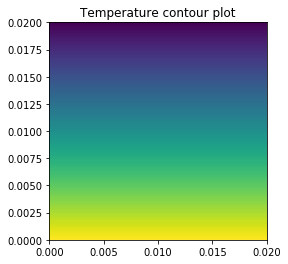

In [13]:
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
grid=griddata(points/L,T.flatten(),(grid_x,grid_y),method='cubic')
#plt.contour(np.reshape(T,(10,10)))
plt.imshow(grid.T, extent=(0,L,0,L), origin='lower')
plt.title('Temperature contour plot')

Text(0.5, 1.0, 'temperature gradient plot')

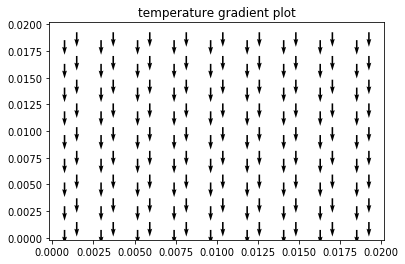

In [14]:
dT=np.zeros((len(cells),2))
Q=np.zeros((len(cells),2))
centerx=[]
centery=[]
for i in range(len(cells)):
    kvec=np.eye(2)*k[i]
    x1,x2,x3=points[cells[i]][0][0],points[cells[i]][1][0],points[cells[i]][2][0]
    y1,y2,y3=points[cells[i]][0][1],points[cells[i]][1][1],points[cells[i]][2][1]
    centerx.append((x1+x2+x3)/3)
    centery.append((y1+y2+y3)/3)
    b1,b2,b3=y2-y3,y3-y1,y1-y2
    c1,c2,c3=x3-x2,x1-x3,x2-x1
    delta=(x1*b1+x2*b2+x3*b3)/2
    bc=np.array([[b1,b2,b3],[c1,c2,c3]])
    temps=np.array([T[cells[i][0]],T[cells[i][1]],T[cells[i][2]]])
    vector=np.array(bc@temps/(2*delta))
    dT[i]=vector
    Q[i]=-kvec@vector

plt.quiver(centerx,centery,dT[:,0],dT[:,1])
plt.title('temperature gradient plot')

In [18]:
print(dT)#this is basically constant, using single precision floating points. for Basis variation only obviously
deltaT=T[0]-T[-1]
print(deltaT/L)#shows that the gradient is constant and equal to the delta T/delta y

[[ 0.00000000e+00 -2.77085065e+00]
 [ 2.24820162e-11 -2.77085065e+00]
 [ 0.00000000e+00 -2.77085065e+00]
 [ 0.00000000e+00 -2.77085065e+00]
 [ 0.00000000e+00 -2.77085065e+00]
 [ 0.00000000e+00 -2.77085065e+00]
 [ 0.00000000e+00 -2.77085065e+00]
 [ 4.49640325e-11 -2.77085065e+00]
 [ 0.00000000e+00 -2.77085065e+00]
 [ 0.00000000e+00 -2.77085065e+00]
 [ 0.00000000e+00 -2.77085065e+00]
 [ 6.74460487e-11 -2.77085065e+00]
 [ 0.00000000e+00 -2.77085065e+00]
 [ 2.24820162e-11 -2.77085065e+00]
 [ 0.00000000e+00 -2.77085065e+00]
 [ 2.24820162e-11 -2.77085065e+00]
 [ 0.00000000e+00 -2.77085065e+00]
 [-2.24820162e-11 -2.77085065e+00]
 [ 2.24820162e-11 -2.77085065e+00]
 [ 0.00000000e+00 -2.77085065e+00]
 [ 0.00000000e+00 -2.77085065e+00]
 [ 0.00000000e+00 -2.77085065e+00]
 [ 0.00000000e+00 -2.77085065e+00]
 [ 1.34892097e-10 -2.77085065e+00]
 [ 4.49640325e-11 -2.77085065e+00]
 [ 6.74460487e-11 -2.77085065e+00]
 [ 0.00000000e+00 -2.77085065e+00]
 [ 4.49640325e-11 -2.77085065e+00]
 [ 6.74460487e-11 -2

In [19]:
print(Q)#this is constant to a large precision as well for the basis variation


[[ 0.00000000e+00  1.11111111e+03]
 [-9.01528852e-09  1.11111111e+03]
 [ 0.00000000e+00  1.11111111e+03]
 [ 0.00000000e+00  1.11111111e+03]
 [ 0.00000000e+00  1.11111111e+03]
 [ 0.00000000e+00  1.11111111e+03]
 [ 0.00000000e+00  1.11111111e+03]
 [-1.80305770e-08  1.11111111e+03]
 [ 0.00000000e+00  1.11111111e+03]
 [ 0.00000000e+00  1.11111111e+03]
 [ 0.00000000e+00  1.11111111e+03]
 [-2.70458655e-08  1.11111111e+03]
 [ 0.00000000e+00  1.11111111e+03]
 [-9.01528852e-09  1.11111111e+03]
 [ 0.00000000e+00  1.11111111e+03]
 [-9.01528852e-09  1.11111111e+03]
 [ 0.00000000e+00  1.11111111e+03]
 [ 9.01528852e-09  1.11111111e+03]
 [-9.01528852e-09  1.11111111e+03]
 [ 0.00000000e+00  1.11111111e+03]
 [ 0.00000000e+00  1.11111111e+03]
 [ 0.00000000e+00  1.11111111e+03]
 [ 0.00000000e+00  1.11111111e+03]
 [-5.40917311e-08  1.11111111e+03]
 [-1.80305770e-08  1.11111111e+03]
 [-2.70458655e-08  1.11111111e+03]
 [ 0.00000000e+00  1.11111111e+03]
 [-1.80305770e-08  1.11111111e+03]
 [-2.70458655e-08  1

In [26]:
print(np.isclose(Q[0],-k[0]*dT[0]))

[ True  True]


Text(0.5, 1.0, 'heat flux plot')

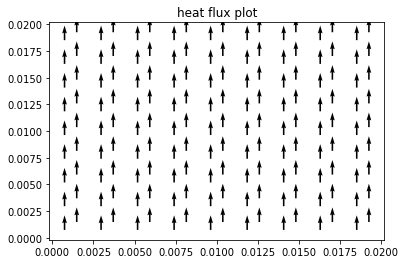

In [15]:
plt.quiver(centerx,centery,Q[:,0],Q[:,1])
plt.title('heat flux plot')

In [7]:
T=np.reshape(T,(10,10))
P=np.reshape(P,(10,10))

In [8]:
def print_HTP(H, T, P, filename="output.txt"):
    """
    Print matrices to .txt-file (name of file = filename).
    H... overall assembled stiffness matrix
    T... nodal temperature vector
    P... nodal force vector

    Make sure, that your system of equations is sorted by
    ascending node numbers, i.e., N1 N2 ... N100.
    """

    F = open(filename, 'w')

    F.write("Stiffness matrix H: \n")
    for row in H:
        for col in row:
            outline = "{0:+8.4e},".format(col)
            F.write("{0:11s}".format(str(outline)))
        F.write("\n")

    F.write("Temperature T: \n")
    for row in T:
        for col in row:
            outline = "{0:+8.4e},".format(col)
            F.write("{0:11s} \n".format(str(outline)))


    F.write("Force vector P: \n")
    for row in P:
        for col in row:
            outline = "{0:+8.4e},".format(col)
            F.write("{0:11s} \n".format(str(outline)))

    F.close()

    return None


In [9]:
print_HTP(H,T,P,'Basis.txt')